# Data visualisation

**M.Geo.336e: Digital Geoscience Seminar**

**Anil Yildiz, Dr. sc.**

<a href="anil.yildiz@uni-goettingen.de">
<img alt="ORCID logo" src="https://cdn0.iconfinder.com/data/icons/small-n-flat/24/678088-enveloppe-letter-512.png" width="16" height="16" /> anil.yildiz@uni-goettingen.de
</a>
<a href="https://www.anilyildiz.info">
<img alt="ORCID logo" src="https://cdn0.iconfinder.com/data/icons/small-n-flat/24/678085-house-512.png" width="16" height="16" /> anilyildiz.info
</a>

## Global temperature anomalies

**Data:**

GISTEMP Team, 2021: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 2021-05-22 at [data.giss.nasa.gov/gistemp/](https://data.giss.nasa.gov/gistemp/")

Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi: [10.1029/2018JD029522](https://doi.org/10.1029/2018JD029522).

In [3]:
# importing modules
import pandas as pd
import io
import requests
# link temperature anomaly dataset from NASA
data_url = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'
data = requests.get(data_url).content
global_temp = pd.read_csv(io.StringIO(data.decode('utf-8')), skiprows = [0, 1, 2, 4], delim_whitespace = True)
print(global_temp)

     Year  No_Smoothing  Lowess(5)
0    1880         -0.15      -0.08
1    1881         -0.07      -0.12
2    1882         -0.10      -0.15
3    1883         -0.17      -0.19
4    1884         -0.27      -0.23
..    ...           ...        ...
136  2016          1.02       0.88
137  2017          0.92       0.91
138  2018          0.85       0.95
139  2019          0.98       0.98
140  2020          1.02       1.01

[141 rows x 3 columns]


In [4]:
import numpy as np
global_temp_col = pd.DataFrame(np.zeros((141, 1)))
global_temp_col.iloc[global_temp.iloc[:, 2] > 0, 0] = '#ffa891'
global_temp_col.iloc[global_temp.iloc[:, 2] < 0, 0] = '#c5e9e7'
global_temp_col.head

<bound method NDFrame.head of            0
0    #c5e9e7
1    #c5e9e7
2    #c5e9e7
3    #c5e9e7
4    #c5e9e7
..       ...
136  #ffa891
137  #ffa891
138  #ffa891
139  #ffa891
140  #ffa891

[141 rows x 1 columns]>

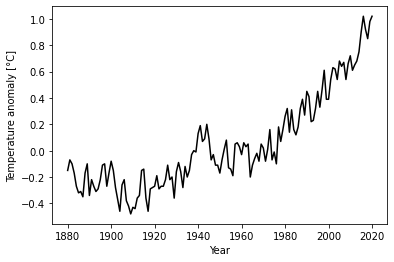

In [5]:
import matplotlib.pyplot as plt

plt.plot(global_temp.iloc[:, 0], global_temp.iloc[:, 1], color = 'black')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly [°C]')
plt.show()

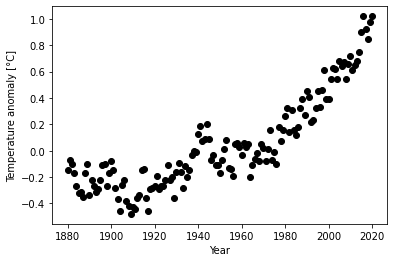

In [8]:
import matplotlib.pyplot as plt

plt.plot(global_temp.iloc[:, 0], global_temp.iloc[:, 1], 'o', color = 'black')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly [°C]')
plt.show()

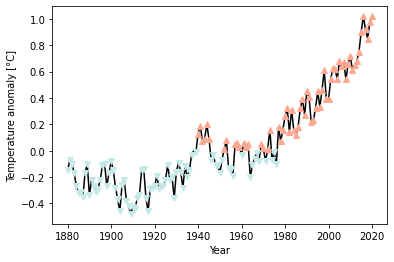

In [10]:
positives = global_temp[global_temp.iloc[:, 1] > 0]
negatives = global_temp[global_temp.iloc[:, 1] < 0]

plt.plot(global_temp.iloc[:, 0], global_temp.iloc[:, 1], color = 'black')
plt.plot(positives.iloc[:, 0], positives.iloc[:, 1], '^', color = '#ffa891')
plt.plot(negatives.iloc[:, 0], negatives.iloc[:, 1], 'v', color = '#c5e9e7')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly [°C]')
plt.show()